Jack Slater  
Michaele Sloversmith  
Paolo Syiaco  
Dilara Topaloglu

# Data Science 100 Final Project Report #

#### Background ####

The researchers behind the Plaicraft project are interested in seeing how people play video games, and are using the game, Minecraft, to gather their data. However, they have a few questions about who to target when recruiting participants, and if the software they have can handle them. 

### Question ###

For this project, we have chosen to answer **Question 1** - "We would like to know which "kinds" of players are most likely to contribute a large amount of data so that we can target those players in our recruiting efforts."

More specifically, we are looking to see if we can predict `total playtime duration` using `age`, `gender`, `experience level`, and `average playtime session`. This is because we are looking for players who will give the researchers the most data, hence predicting total played hours.

### Reading in and Tidying the Datasets ###

The following packages are installed to help us create and visualize our data analysis:

In [3]:
library(tidyverse)
library(repr)
library(tidymodels)
library(GGally)
library(ISLR)
library(readr)
library(cowplot)
library(ggplot2)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

In [4]:
options(repr.matrix.max.rows = 10)
# Importing both CSV files into R and loading them
url_players <- "https://drive.google.com/uc?export=download&id=1Mw9vW0hjTJwRWx0bDXiSpYsO3gKogaPz"
url_sessions <- "https://drive.google.com/uc?export=download&id=14O91N5OlVkvdGxXNJUj5jIsV5RexhzbB"
players <- read_csv(url_players)
sessions <- read_csv(url_sessions)
players
sessions

Rows: 196 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, age
lgl (3): subscribe, individualId, organizationName

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,age,individualId,organizationName
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<lgl>,<lgl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9,NA,NA
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17,NA,NA
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17,NA,NA
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21,NA,NA
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21,NA,NA
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,TRUE,b6e9e593b9ec51c5e335457341c324c34a2239531e1890b93ca52ac1dc76b08f,0.0,Bailey,Female,17,NA,NA
Veteran,FALSE,71453e425f07d10da4fa2b349c83e73ccdf0fb3312f778b35c5802c3292c87bd,0.3,Pascal,Male,22,NA,NA
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,17,NA,NA


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,25/07/2024 03:22,25/07/2024 03:58,1.72188e+12,1.72188e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,25/05/2024 16:01,25/05/2024 16:12,1.71665e+12,1.71665e+12
⋮,⋮,⋮,⋮,⋮
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,10/05/2024 23:01,10/05/2024 23:07,1.71538e+12,1.71538e+12
7a4686586d290c67179275c7c3dfb4ea02f4d317d9ee0e2cee98baa27877a875,01/07/2024 04:08,01/07/2024 04:19,1.71981e+12,1.71981e+12
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,28/07/2024 15:36,28/07/2024 15:57,1.72218e+12,1.72218e+12


For this project, we are using both of the provided datasets: `players.csv` and `sessions.csv`

#### First Data Set

This data set includes 9 variables and 196 observations. It:

- Describes players
    - Lists their ages as integers
    - States their gender as a character value
    - Lists their names as a character value
    - Lists their experience level ("amateur", "regular", "pro", "veteran") as a character value
    - States whether each person subscribed to emails from the researchers as a logical value
    - Lists each player's anonymous email as a character value
    - Lists each player's individual ID and organization name if it applies as a logical value

#### Second Data Set

This data set includes 5 variables and 1535 observations. It: 

- Describes individual play sessions of each player:
    - The emails of each player, for each session they play as a character value
    - The start time and end time of each session played, including the:
        - month
        - day
        - year
        - hour
        - minute
      as character values
    - Lists the start and end times of each session in Unix Timestamp Format


In [5]:
# Tidying up the sessions dataset 
sessions_tidy <- sessions |>
    select(hashedEmail, start_time, end_time) |>
    filter(na.rm = TRUE)
# Calculating the average session time per player
sessions_tidy <- sessions_tidy |> 
    mutate(start_time_numeric = as.numeric(as.POSIXct(start_time, format="%d/%m/%Y  %H:%M"))) |>
    mutate(end_time_numeric = as.numeric(as.POSIXct(end_time, format="%d/%m/%Y  %H:%M"))) |>
    mutate(session_length = (end_time_numeric - start_time_numeric)/60)
average_session_length <- sessions_tidy |>
    group_by(hashedEmail) |>
    summarise(average_session_time = mean(session_length, na.rm = TRUE))
# Moving the average_session_length column to the players dataset (SOURCE: https://stat545.com/join-cheatsheet.html - from the "Additional Resources" section of Chapter 3 in the book)
players_merged <- inner_join(players, average_session_length, join_by(hashedEmail))
players_merged

experience,subscribe,hashedEmail,played_hours,name,gender,age,individualId,organizationName,average_session_time
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<lgl>,<lgl>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9,NA,NA,74.77778
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17,NA,NA,85.00000
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17,NA,NA,5.00000
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21,NA,NA,50.00000
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21,NA,NA,9.00000
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
Veteran,TRUE,ba24bebe588a34ac546f8559850c65bc90cd9d51b821581bd6e25cff437a1081,0.1,Gabriela,Female,44,NA,NA,11.00000
Veteran,FALSE,71453e425f07d10da4fa2b349c83e73ccdf0fb3312f778b35c5802c3292c87bd,0.3,Pascal,Male,22,NA,NA,21.00000
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,17,NA,NA,5.00000


To clean and tidy the `sessions` dataset, we selected the variables we needed (`hashedEmail`, `start_time`, `end_time`) and made sure there were no N/As in any of the rows. We then mutated the start and end time variables to make them numbers that were easier to work with using `as.numeric(as.POSIXct())`. This is because we needed to find the average session length for each player or "hashed email”. From this dataset, we only needed average session length, so we used inner_join to add that variable to the `players` dataset.

In [6]:
# Tidying up the players dataset
players_tidy <- players_merged |>
    select(experience, hashedEmail, played_hours, gender, age, average_session_time) |>
    filter(na.rm = TRUE) |>
    relocate(experience, .after = gender) |>
    relocate(age, .after = played_hours) |>
    arrange(desc(played_hours)) |>
    mutate(gender = case_when(
        gender == "Male" ~ "Male",
        gender == "Female" ~ "Female",
        TRUE ~ "Other")) |>

# Combining all other genders into "Other" to make it easier to work with
mutate(gender_male = case_when(gender == "Male" ~ 1, gender == "Female" ~ 0, gender == "Other" ~ 0),
        gender_female = case_when(gender == "Male" ~ 0, gender == "Female" ~ 1, gender == "Other" ~ 0),
        gender_other = case_when(gender == "Male" ~ 0, gender == "Female" ~ 0, gender == "Other" ~ 1)) |>
# Converting the data in the "Experience" column to numbers 
mutate(experience = recode(experience, "Beginner" = 1, "Amateur" = 2, "Regular" = 3, "Veteran" = 4, "Pro" = 5))
players_tidy 

hashedEmail,played_hours,age,gender,experience,average_session_time,gender_male,gender_female,gender_other
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,223.1,17,Male,3,66.99087,1,0,0
b622593d2ef8b337dc554acb307d04a88114f2bf453b18fb5d2c80052aeb2319,218.1,20,Other,3,150.34043,0,0,1
ad6390295640af1ed0e45ffc58a53b2d9074b0eea694b16210addd44d7c81f83,178.2,19,Female,3,80.45578,0,1,0
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,150.0,16,Female,2,62.55975,0,1,0
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,56.1,23,Male,2,15.46774,1,0,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
a2a0612e9a7da558cbac2ee3c816740324505a69a6e042c94aa1b67731f9ff01,0,18,Male,3,6,1,0,0
2cfed571797b66cc810c32562fc5b0f70b5bec0f5250799245527135bbf9662e,0,16,Male,2,6,1,0,0
bda1905e54b6c745bcced9d59ce655a5bfd03c35cc6abdd8d1610e5c416f79d1,0,17,Male,2,5,1,0,0


To clean and tidy the `players` dataset that included our new average session time variable, we first selected the variables we needed (`experience`, `hashedEmail`, `played_hours`, `gender`, `age`, `average_session_time`) and removed N/As. We used the `relocate()` function simply to order the variables to something more visually pleasing. For our prediction model to work, we needed to then convert the `gender` variable into separate columns. To do this, we first combined any gender that was not male or female into the `Other` category, because there is much less of each of the other genders. Then we used `mutate()` and `case_when()` to turn each variable into a binary number, depending on what the focus was. This allowed us to properly complete our model. We then used `recode()` to give each experience level a number as well. 


### Data Analysis and Findings ###

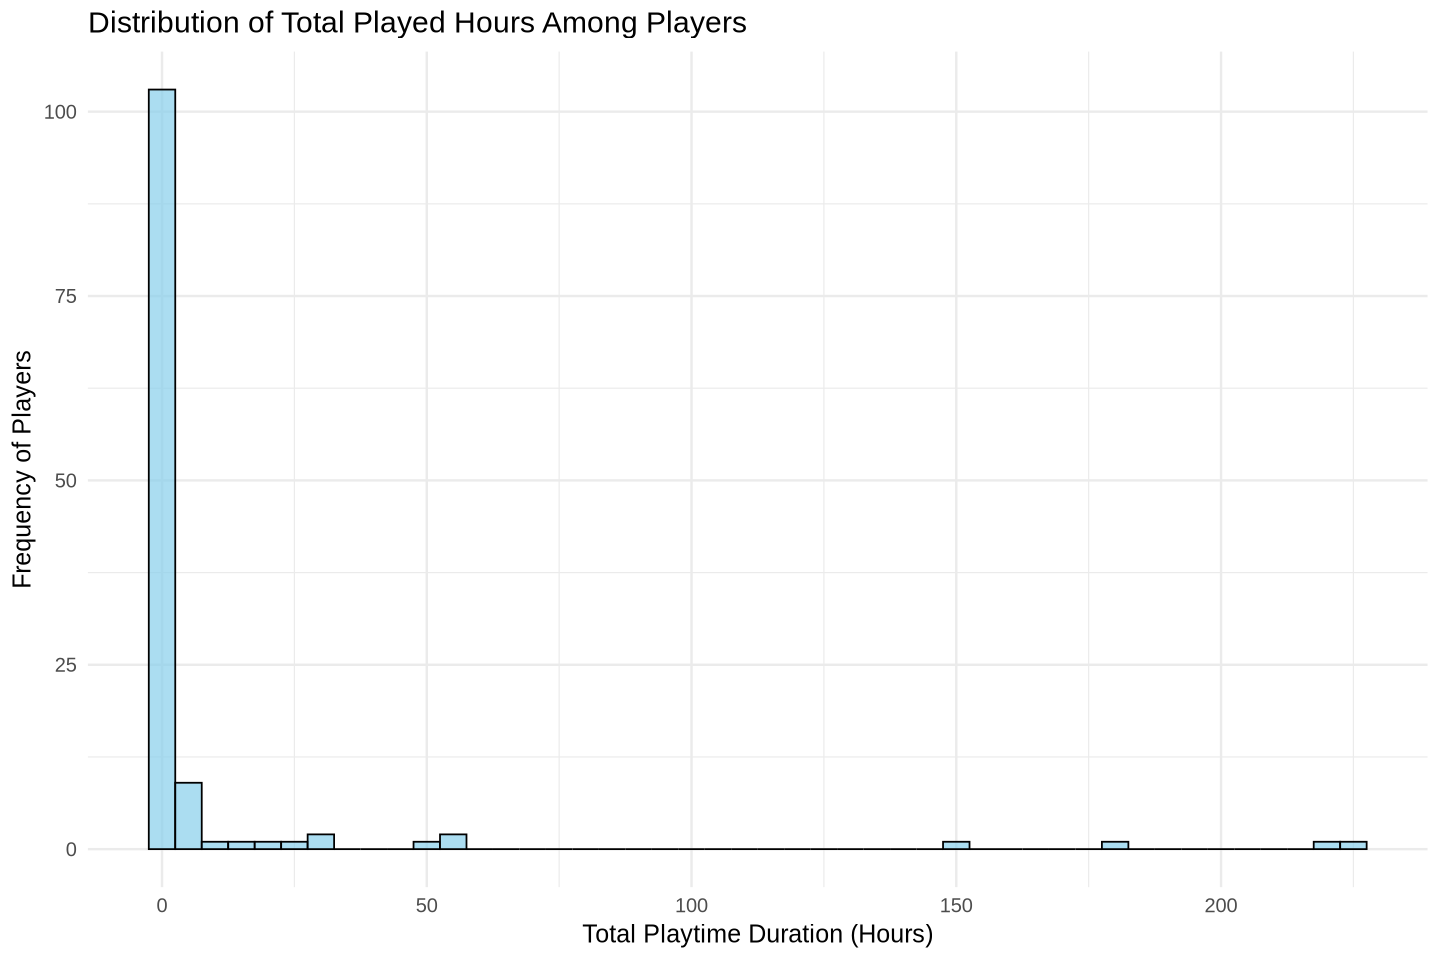

In [44]:
# Graphing distribution of played hours
options(repr.plot.width = 12, repr.plot.height = 8)

hours_played <- ggplot(players_tidy, aes(x = played_hours)) +
  geom_histogram(binwidth = 5, fill = "skyblue", color = "black", alpha = 0.7) +
  xlab("Total Playtime Duration (Hours)") +
  ylab("Frequency of Players") + 
  ggtitle("Distribution of Total Played Hours Among Players") + 
  theme_minimal(base_size = 15)
hours_played

**Figure 1:** This histogram shows that most players have very low playtime, with the largest number of players at around 0 hours. As playtime increases, the number of players drops sharply. There are spikes at certain playtime values (such as 5, 30, 50, and 55 hours), but overall, most players tend to have relatively low playtime durations. A few players, however, have very high playtime, as seen in the higher bars at values like 150, 180, and 220 hours, though these are much less common. 

`geom_smooth()` using formula = 'y ~ x'


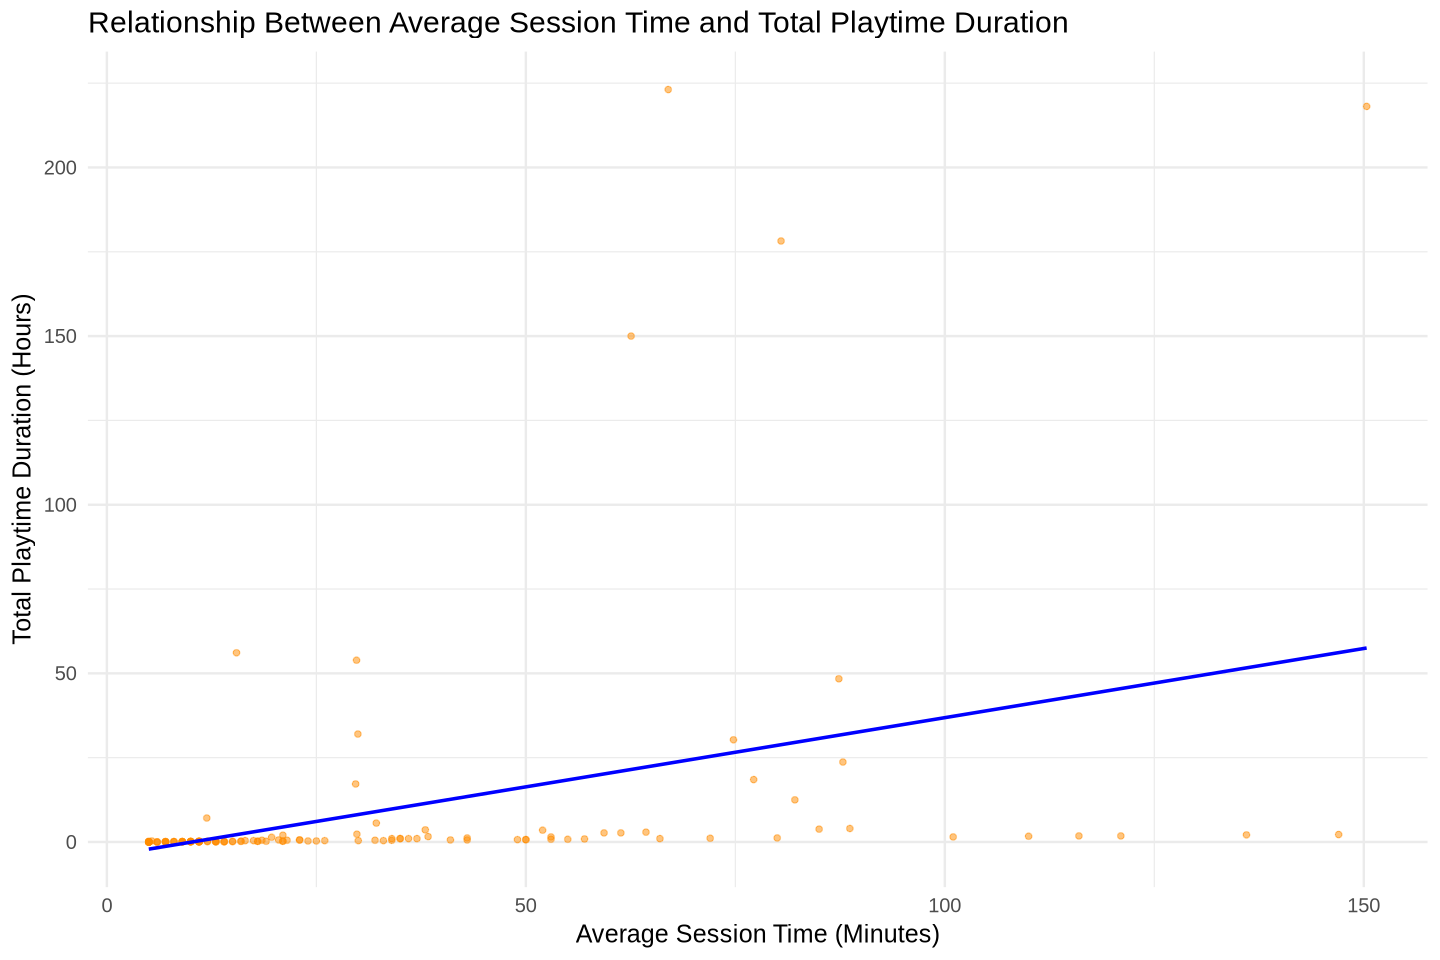

In [43]:
# Average session time and played hours relationship
options(repr.plot.width = 12, repr.plot.height = 8)
session_vs_playtime_plot <- ggplot(players_tidy, aes(x = average_session_time, y = played_hours)) +
  geom_point(alpha = 0.5, color = "darkorange") +
  geom_smooth(method = "lm", color = "blue", se = FALSE) +
  xlab("Average Session Time (Minutes)") +
  ylab("Total Playtime Duration (Hours)") +
  ggtitle("Relationship Between Average Session Time and Total Playtime Duration") +
  theme_minimal(base_size = 15)

session_vs_playtime_plot 

**Figure 2:** This scatter plot shows a majority of points clustered around 0 playtime duration and within the 5 to 25 minutes range of average session time. Notably, there is a single high-value point at around 60 hours of playtime corresponding to an average session time of 20 minutes. As session times increase beyond 25 minutes, the density of points decreases, with most points still showing low playtime durations, around 0 or 5 hours. Between 75 and 100 minutes, the density of points further drops, though session times continue to rise. Points after 100 minutes are sparse, all with near-zero playtime. 

The blue line represents the trend, beginning below zero duration and increasing steadily with session time. This indicates a positive relationship between average session time and playtime duration, suggesting that as players spend more time per session, their total playtime tends to increase as well. The scatter points, however, show variability, with many players still logging low playtime despite higher session times, pointing to diverse play patterns across the dataset. 

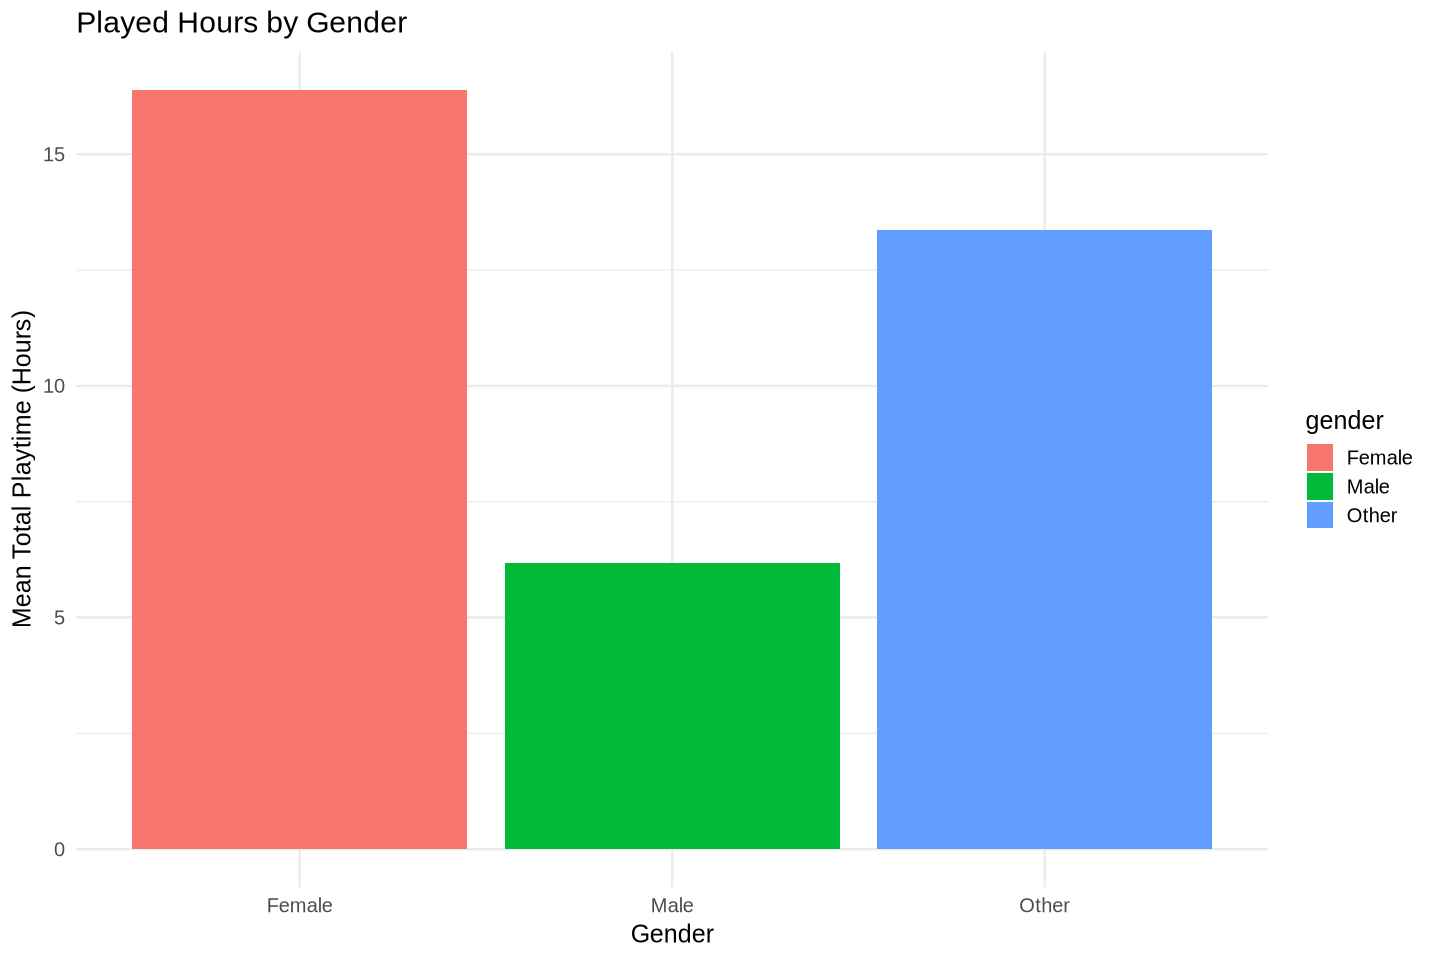

In [42]:
# Graphing played hours across genders in tidy data
options(repr.plot.width = 12, repr.plot.height = 8)
gender_summary <- players_tidy |>
    group_by(gender) |>
    summarize(mean_hours = mean(played_hours, na.rm = TRUE))

gender_playtime_plot <- ggplot(gender_summary, aes(x = gender, y = mean_hours, fill = gender)) +
    geom_bar(stat = "identity") +
    xlab("Gender") +
    ylab("Mean Total Playtime (Hours)") +
    ggtitle("Played Hours by Gender") +
    theme_minimal(base_size = 15)

gender_playtime_plot 

**Figure 3:** This bar chart shows the average total playtime by gender. Female players have the highest average playtime, above 15 hours, followed by "Other" gender players, around 12.5–15 hours. Male players have the lowest average, around 6 hours. This suggests that female players tend to spend more time playing on average, while male players play less overall, with the "Other" group falling in between. These differences may reflect varying gaming habits across genders. 

`geom_smooth()` using formula = 'y ~ x'


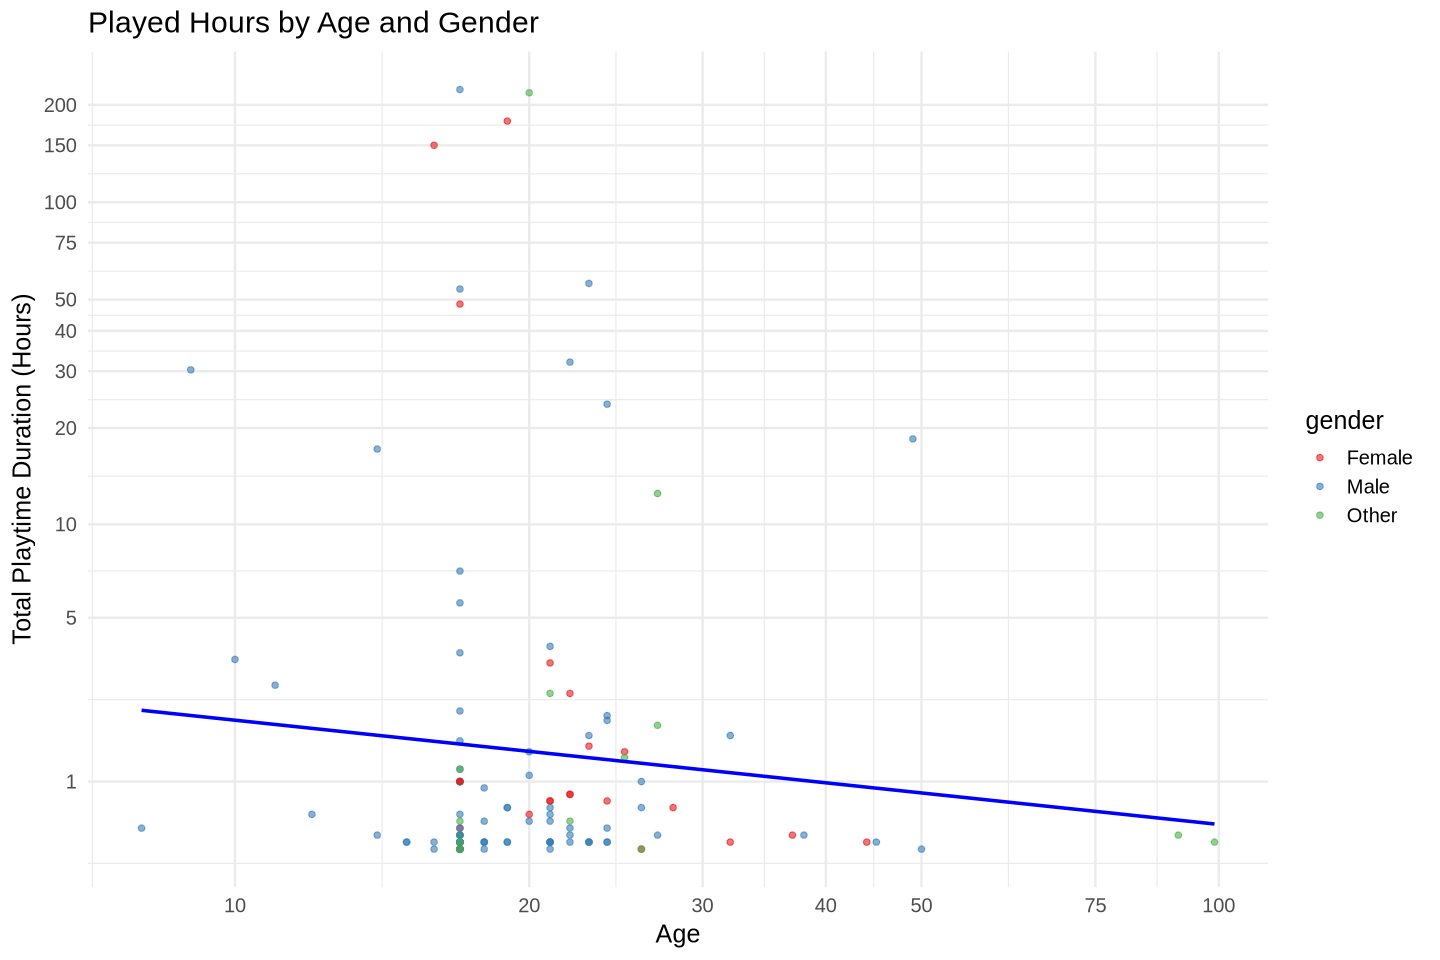

In [41]:
# Visualizing age vs played hours with gender
options(repr.plot.width = 12, repr.plot.height = 8)
age_played_hours <- ggplot(players_tidy, aes(x = age, y = played_hours, color = gender)) +
  geom_point(alpha = 0.6) +
  geom_smooth(method = "lm", se = FALSE, color = "blue") +
    scale_x_continuous(trans = "pseudo_log",breaks = c(1, 5, 10, 20, 30, 40, 50, 75, 100)) +
    scale_y_continuous(trans = "pseudo_log",breaks = c(1, 5, 10, 20, 30, 40, 50, 75, 100, 150, 200)) +
  xlab("Age") +
  ylab("Total Playtime Duration (Hours)") +
  ggtitle("Played Hours by Age and Gender") +
  theme_minimal(base_size = 15) +
  scale_color_brewer(palette = "Set1")

age_played_hours


**Figure 4:** The scatter plot shows that most players, across all genders, have low playtime duration, particularly among younger players (under 25), with males exhibiting more variation in playtime. The highest playtime (up to 225 hours) is observed in males between ages 17.5 and 25. Older players generally show lower playtime, especially around ages 65 and above, with most points clustered near 0 hours. The regression line represents the overall trend, starting at around 10 hours for younger players and steadily decreasing with age, reflecting a decline in playtime as age increases. 


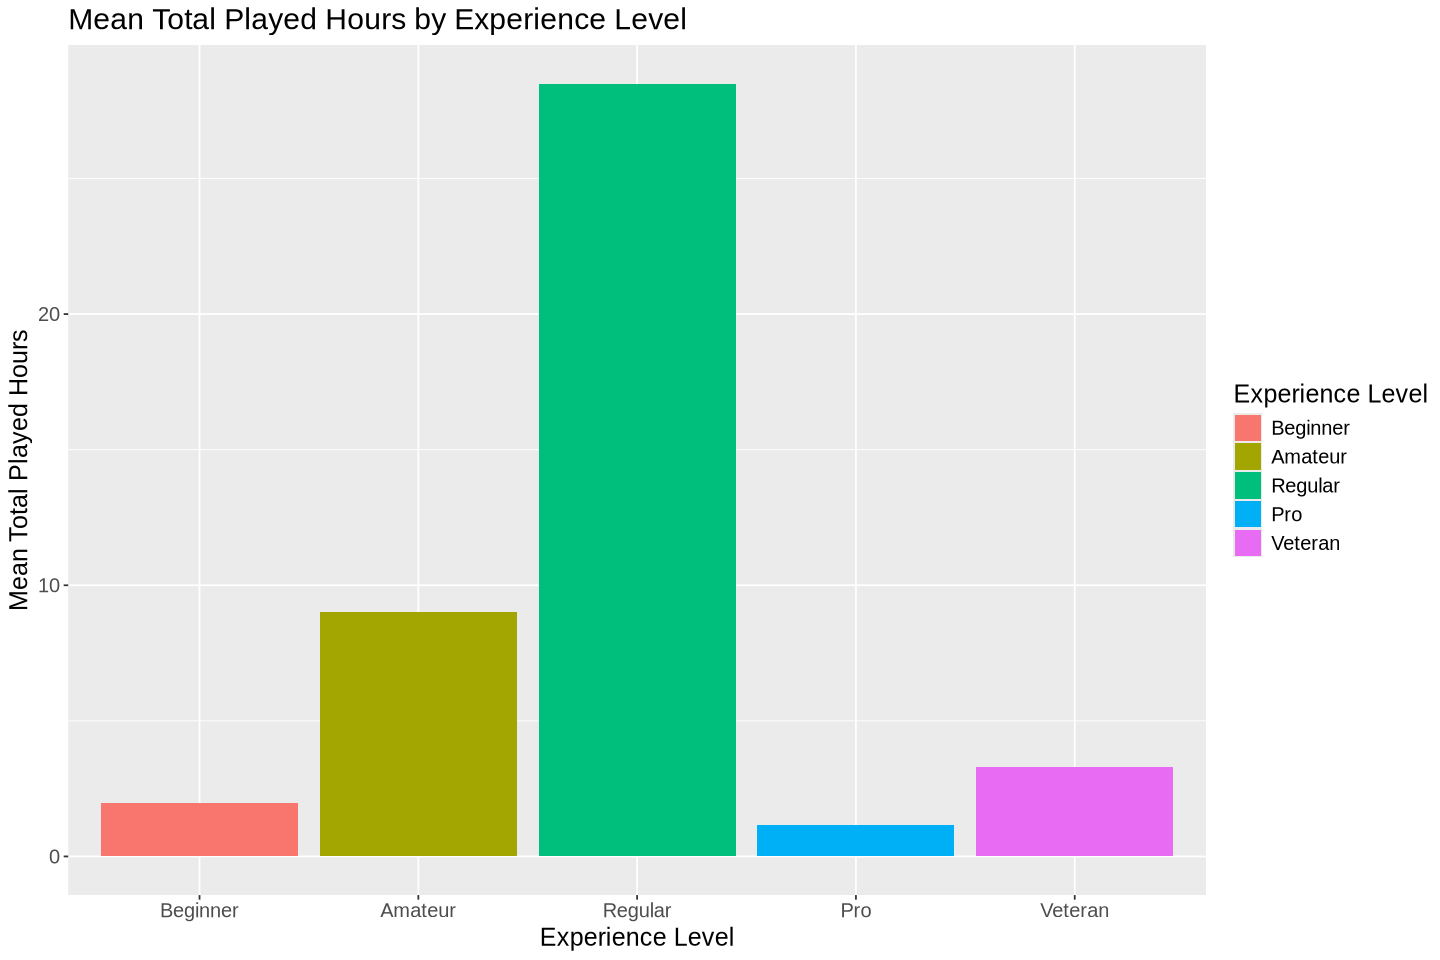

In [18]:
# Bar chart with hours and experience
options(repr.plot.width = 12, repr.plot.height = 8)

summary_experience <- players_tidy |>
                    mutate(experience = factor(experience, levels = 1:5, 
                           labels = c("Beginner", "Amateur", "Regular", "Pro", "Veteran"))) |>
                    group_by(experience) |>
                    summarize(mean_played_hours = mean(played_hours))

# Bar chart
experience_plot <- summary_experience |>
                ggplot(aes(x = experience, y = mean_played_hours, fill = experience)) +
                geom_bar(stat = "identity") +
                labs(x = "Experience Level", y = "Mean Total Played Hours", 
                     title = "Mean Total Played Hours by Experience Level", fill = "Experience Level") +
                theme(text = element_text(size=15))
experience_plot

**Figure 5:** This bar chart shows the mean total played hours across five experience levels. Players identified as "Beginner" have the lowest playtime, averaging around 2 hours. "Amateur" players average close to 8 hours, while "Regular" players have the highest playtime, averaging approximately 28 hours. Interestingly, "Pro" players have the lowest playtime after "Beginner.""Veteran" players fall just above "Beginner," with an average around 4 hours. This suggests that experience does not always correlate with higher playtime, and some experience levels, like "Pro," show lower engagement than expected. 

In [12]:
set.seed(3500) #DO NOT CHANGE
# Splitting the data into test and training splits
players_split <- initial_split(players_tidy, prop = 0.75, strata = played_hours)
players_training <- training(players_split)
players_testing <- testing(players_split)


With our clean dataset, we split it `75/25` into training and testing data, so our model can learn before it is put to the test.

In [13]:
set.seed(2499) # DO NOT CHANGE  
# Creating the K-NN regression model
players_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |> 
       set_engine("kknn") |>
       set_mode("regression")
players_recipe <- recipe(played_hours ~ age + gender_male + gender_female + gender_other + experience + average_session_time, data = players_training) |>
    step_scale(all_predictors()) |>
    step_center(all_predictors())

# Tuning the model to find the best K value
players_vfold <- vfold_cv(players_training, v = 5, strata = played_hours)
gridvals <- tibble(neighbors = seq(1, 60, by = 3))

players_workflow <- workflow() |>
    add_recipe(players_recipe) |>
    add_model(players_spec) 

players_results <- players_workflow |>
    tune_grid(resamples = players_vfold, grid = gridvals) |>
    collect_metrics()

players_min <- players_results |>
    filter(.metric == "rmse") |>
    slice_min(mean)
    players_min

k_min <- players_min |>
        pull(neighbors)

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
55,rmse,standard,28.84632,5,8.88291,Preprocessor1_Model19


For this project, we chose to use $k$-nn regression to predict total played hours, therefore our first step was to create our recipe, scale our predictors, and create our $k$-nn spec so we could use 5-fold cross validation to find a good k-value.

After collecting the metrics, we found the lowest rmse and pulled the $k$-value associated with it. 

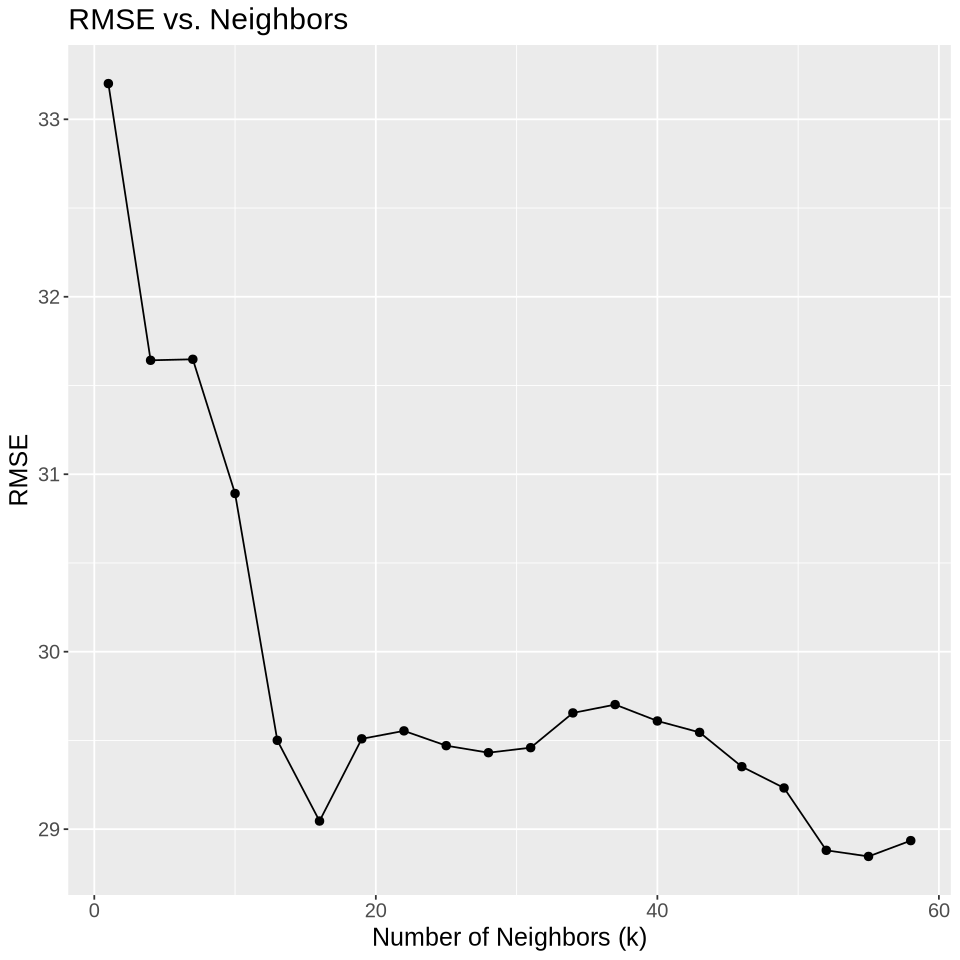

In [36]:
options(repr.plot.width = 8, repr.plot.height = 8)
ggplot(players_results |> 
       filter(.metric == "rmse"), aes(x = neighbors, y = mean)) +
        geom_line() +
        geom_point(size = 2) +
        xlab("Number of Neighbors (k)") +
        ylab("RMSE") +
        ggtitle("RMSE vs. Neighbors") +
        theme(text = element_text(size=15))

**Figure 6:** This plot shows the RMSE against the number of $k$-values. This way we can visualize where our best $k$-value was taken from, and how it compares to the others.

In [15]:
# Fitting the model with the optimal K value 
players_best_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = k_min) |> 
       set_engine("kknn") |>
       set_mode("regression")

players_best_fit <- workflow() |>
                    add_recipe(players_recipe) |>
                    add_model(players_best_spec) |>
                    fit(data = players_training)

# Applying the model to the testing data to check for the RMSE
players_summary <- players_best_fit |>
                    predict(players_testing) |>
                    bind_cols(players_testing) |>
                    metrics(truth = played_hours, estimate = .pred)
players_summary

# set.seed(2024) # DO NOT CHANGE 

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,37.68946387
rsq,standard,0.09510881
mae,standard,15.08357955


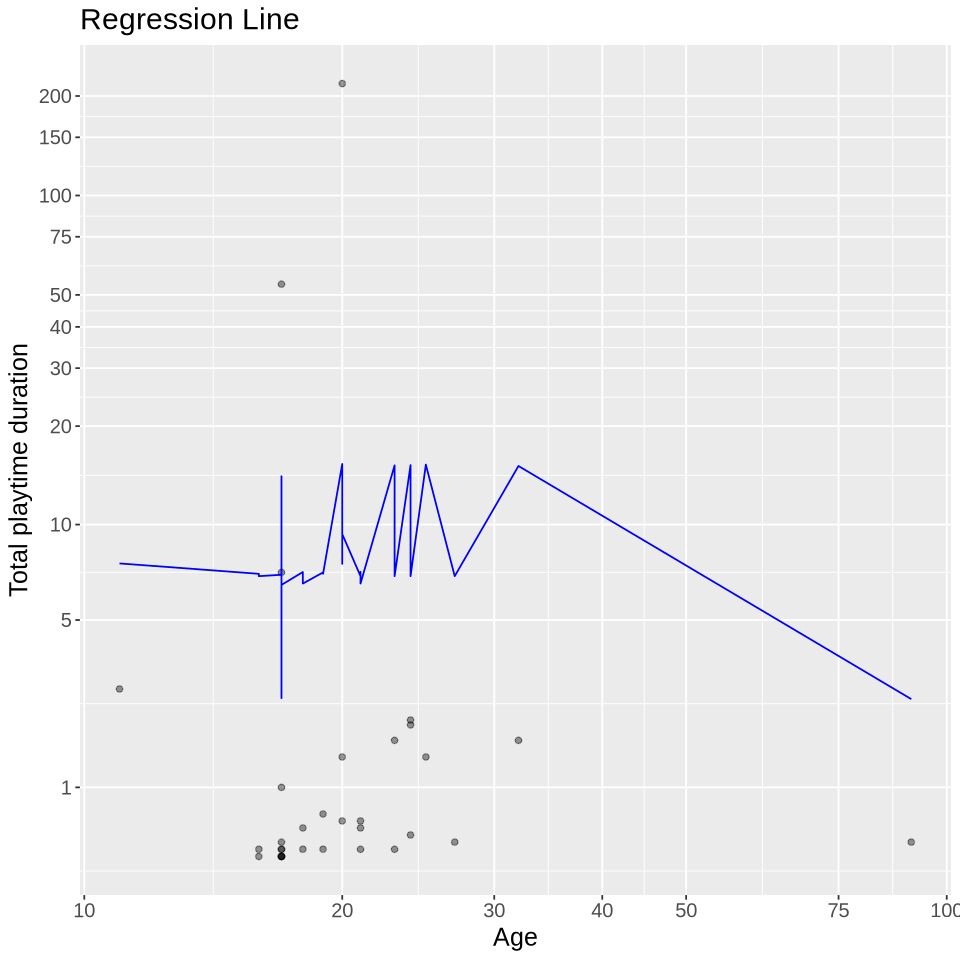

In [34]:
# Applying the model to the testing data 
players_preds <- players_best_fit |>
                    predict(players_testing) |>
                    bind_cols(players_testing)
players_plot <- ggplot(players_preds, aes(x = age, y = played_hours)) +
            geom_point(alpha = 0.4) +
            xlab("Age") +
            ylab("Total playtime duration") + 
            scale_x_continuous(trans = "pseudo_log",breaks = c(1, 5, 10, 20, 30, 40, 50, 75, 100)) +
            scale_y_continuous(trans = "pseudo_log",breaks = c(1, 5, 10, 20, 30, 40, 50, 75, 100, 150, 200)) +
            geom_line(data = players_preds, aes(x = age, y = .pred), color = "blue") +
            ggtitle("Regression Line") +
            theme(text = element_text(size = 15))
players_plot

.pred,hashedEmail,played_hours,age,gender,experience,average_session_time,gender_male,gender_female,gender_other
<dbl>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
15.340000,b622593d2ef8b337dc554acb307d04a88114f2bf453b18fb5d2c80052aeb2319,218.1,20,Other,3,150.34043,0,0,1
6.976364,36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,53.9,17,Male,2,29.79231,1,0,0
6.858182,e74c60a92c0100e7240be56d66969db85856152b048c639331a3595f901461ae,7.1,17,Male,1,11.91489,1,0,0
7.572727,8e0aac3020b3fd9cdef4840b533b4b105aaf1ce1f6f2df3f328ba2a44cecfdc1,2.9,11,Male,2,64.33333,1,0,0
15.216364,8d2eed1f399e0d77cebb8fcc48ed19ad2fa8e3bb3fa683cb90e0ac6d42677bf2,2.2,24,Male,4,147.00000,1,0,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
7.023636,e21a324ccf5c873bafe82e47d5137b36aa312ee4803eeb5cbc6cf945f9bb3f38,0,17,Male,3,6,1,0,0
9.332727,25879aecc205544bc6505f9faf768356e0a3b7126057308ae3235f8a514e9a62,0,17,Female,2,7,0,1,0
9.385455,722ab6d91280c439f2780767a1250889e93f75fc0ba0bc48175da022ab3e9ea9,0,17,Female,1,5,0,1,0


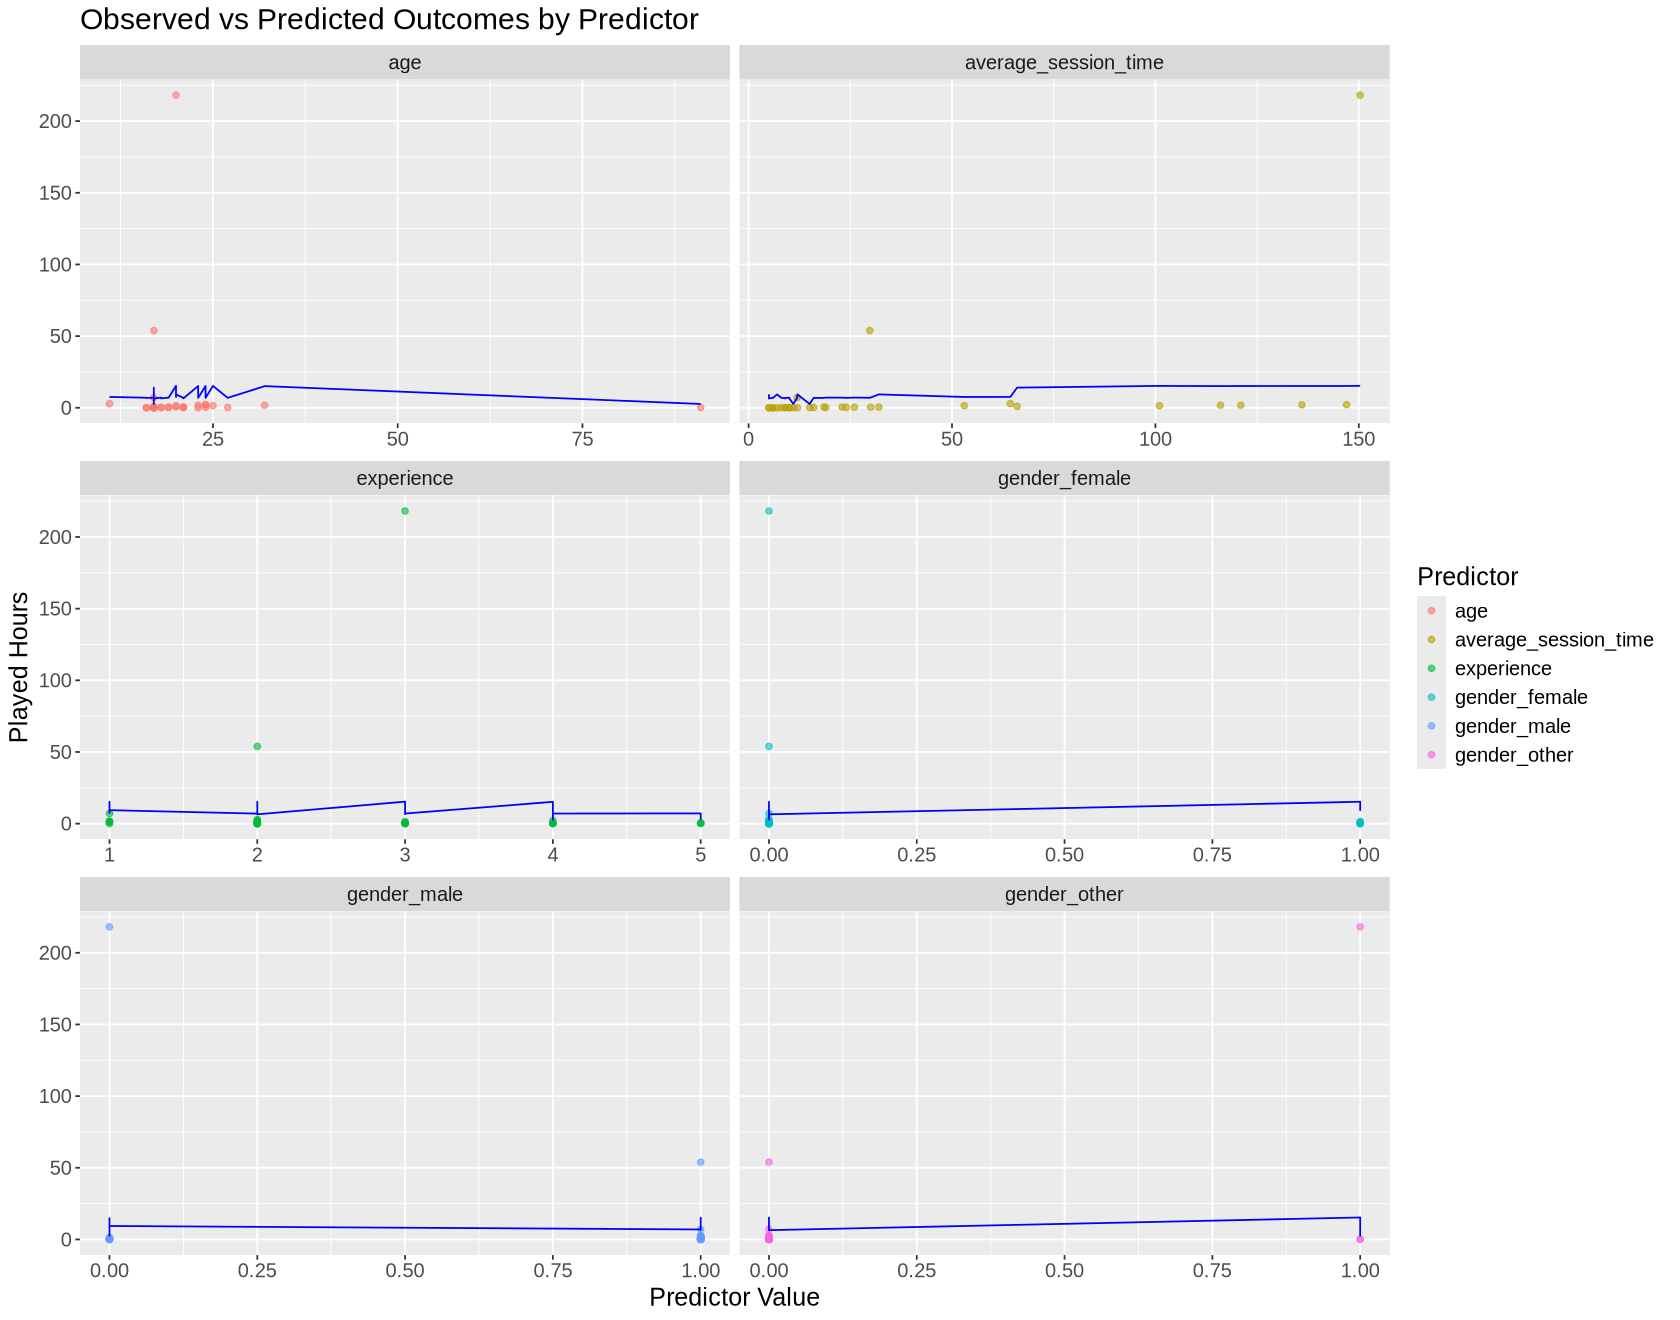

In [35]:
options(repr.plot.width = 14, repr.plot.height = 11)

player_summary_2 <- players_best_fit |>
                    predict(players_testing) |>
                    bind_cols(players_testing)
player_summary_2

results_long <- player_summary_2 |>
              pivot_longer(cols = c("age", "gender_male", "gender_female", "gender_other", "experience", "average_session_time"), 
                names_to = "predictor",   
                values_to = "value")

results_plot <- ggplot(results_long, aes(x = value, y = played_hours)) +
  geom_point(aes(color = predictor), alpha = 0.6) + 
  geom_line(aes(y = .pred, group = predictor), color = "blue") + # Predicted line
  facet_wrap(~ predictor, scales = "free_x", ncol = 2, nrow = 3) + # Facet by predictor
  labs(
    x = "Predictor Value",
    y = "Played Hours",
    title = "Observed vs Predicted Outcomes by Predictor",
    color = "Predictor") +
    theme(text = element_text(size=15))
results_plot